# Part II - (Forde GoBike System Data)
## by Fulwah Alarifi

## Investigation Overview

**Goal of the Analysis**
This analysis aims to uncover patterns in how people use bike-sharing services by looking at trip duration, user demographics, and usage timing. The goal is to better understand user behavior and identify insights that can inform business decisions.

**Key Insights (Executive Summary)**

* **Subscribers** mostly take shorter, more frequent trips during weekday commute hours, pointing to regular use for transportation.
* **Customers** (casual users) ride longer and at more varied times, with trips spread across the day and week—suggesting more recreational or occasional use.
* **Trip duration** is fairly steady for users aged 20–60, but younger and older riders show more variability and tend to take longer trips.
* **Gender patterns** stand out—female Customers take the longest trips on average, while male Subscribers dominate in number and stick to short trips.
* **Time of day and user type** show a strong link: Subscribers are busiest during rush hours, while Customer rides are more evenly spread.
* **Multivariate analysis** confirms that user type is the biggest driver of trip patterns, though age and gender add meaningful context.

These findings can help guide marketing strategies, improve operations, and shape the service to better match the needs of different rider groups.



## Dataset Overview and Executive Summary

The dataset includes detailed info on each bike-sharing trip—like how long it lasted, whether the rider was a Subscriber or Customer, their gender, birth year, and when and where the trip started and ended. This level of detail makes it possible to explore both individual habits and broader trends in how people use the system.

**Summary of Main Findings:**

* **Subscribers** make up the bulk of users. Their trips are usually short and mostly happen during the morning and evening commute hours.
* **Customers** take longer, more flexible rides that aren't tied to typical rush hours—suggesting more recreational or casual use.
* Most trips come from users aged **20 to 60**, but those over 70 tend to take longer rides, which could be due to different needs or simply fewer users in that group.
* **Female riders** take fewer trips overall, but their average trip time is longer—especially among Customers.
* There's **no strong link** between age and trip start time, showing that people of all ages use the service at various times.
* **Multivariate plots** show that trip behavior is shaped by a mix of user type, age, and gender—giving a more complete picture of how different groups use the service.

Together, these insights help paint a clearer picture of user behavior and point to areas where the service can be better tailored to meet different needs.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
#Loading the dataset
df = pd.read_csv('/content/201902-fordgobike-tripdata.csv')

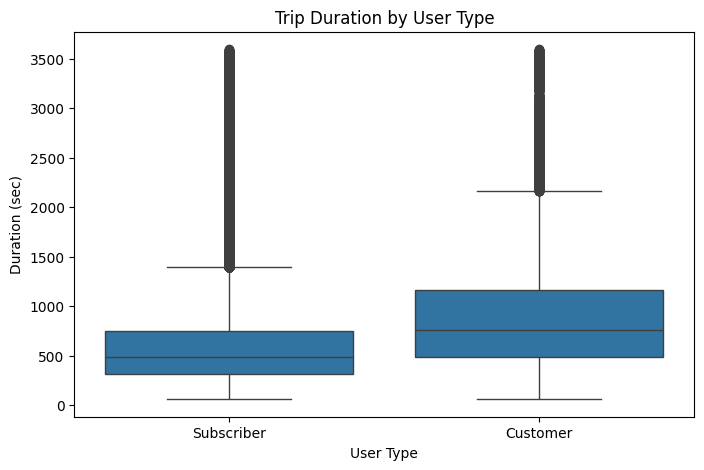

In [10]:
#Distribution of Trip Durations by User Type
# Filter duration under 60 min for clarity
df_filtered = df[df['duration_sec'] <= 3600]


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='user_type', y='duration_sec')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')

plt.show()


## Trip Duration by User Type

This box plot compares how long trips last for Subscribers versus Customers, measured in seconds. Right away, it’s clear that Customers tend to take much longer trips than Subscribers. Their median trip duration is higher, and their trip lengths vary a lot more.

**Subscribers** have shorter, more consistent trip durations. Most of their rides fall within a narrow range, which fits the profile of someone using the service for regular commuting.
**Customers**, on the other hand, show a wide spread of trip durations, with plenty of long rides—suggesting they’re more likely riding for leisure or occasional use.

**Purpose:**
To show how trip behavior differs between daily commuters (Subscribers) and casual users (Customers).

**Key Observation:**

* **Subscribers:** Short, consistent trips
* **Customers:** Longer, more varied trips with more frequent long rides

**Plot Details Checklist:**

* **Title:** “Trip Duration by User Type”
* **X-axis:** User Type (Subscriber, Customer)
* **Y-axis:** Duration (seconds)
* **Box Plot Features:** Shows median, quartiles, and outliers clearly


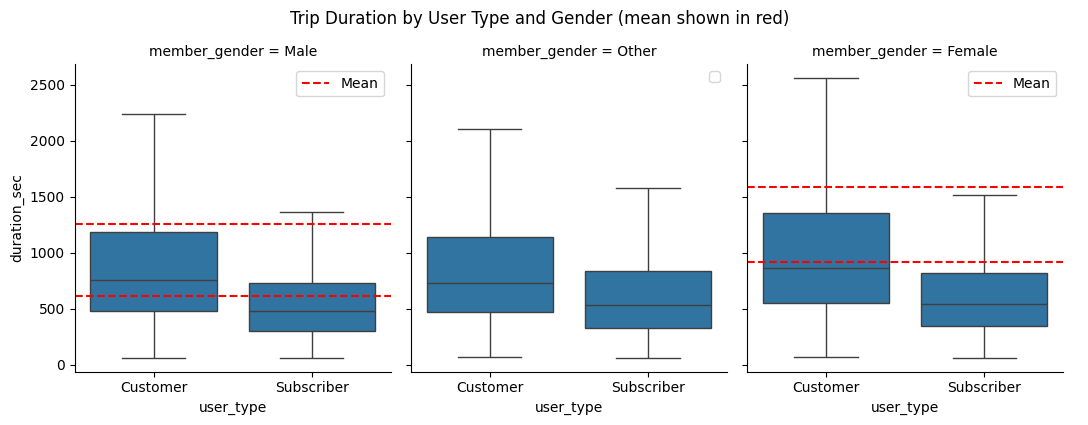

In [12]:
# finding the relationship between trip duration depending on thegender and user
# type by using Facet Plot Add 'age' column
df['age'] = 2024 - df['member_birth_year']

# Facet plot: Boxplot of trip duration, by user type, faceted by gender
g = sns.catplot(
    data=df,
    x="user_type", y="duration_sec", col="member_gender",
    kind="box", showfliers=False, height=4, aspect=0.9
)
# Add average line for each plot
for ax, gender in zip(g.axes[0], df['member_gender'].unique()):
    # Exclude NaN values from the calculation
    avg = df[df['member_gender']==gender].groupby('user_type')['duration_sec'].mean()
    for i, user_type in enumerate(avg.index):
        ax.axhline(avg[user_type], ls="--", color="red", label="Mean" if i==0 else "")
    ax.legend()
g.fig.suptitle("Trip Duration by User Type and Gender (mean shown in red)", y=1.05)
plt.show()

##Trip Duration by User Type and Gender (Means in Red)

This faceted box plot breaks down trip duration (in seconds) by both user type and gender—covering Male, Female, and Other categories. The red dashed line marks the mean trip time for each group.

**Purpose:**
To explore how trip duration varies when considering both user type and gender, and to uncover any notable differences in behavior across these groups.

**Key Observations:**

* Across all genders, **Customers consistently take longer trips** than Subscribers.
* **Female Customers** stand out with the highest average and median trip durations compared to all other groups.
* **Male** and **Other** gender users show similar trends, with shorter trips overall and less variation.
* There’s much more variability in trip length among Customers, especially Female ones, with more frequent long trips.

**Polish Checklist:**

* **Title:** “Trip Duration by User Type and Gender (mean shown in red)”
* **X-axis:** User Type (Customer, Subscriber)
* **Y-axis:** Duration (seconds)
* **Mean lines:** Clearly marked in red
* **Facets:** Each panel labeled by gender, with all plot elements clearly readable


In [18]:
# Calculate mean trip duration by age
mean_duration_by_age = df.groupby("age")["duration_sec"].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="age", y="duration_sec",
    hue="user_type",
    style="member_gender",
    alpha=0.2
)

# Overlay line for average trip duration by age
plt.plot(mean_duration_by_age.index, mean_duration_by_age.values, color='green', lw=2, label='Mean Trip Duration by Age')

plt.xlabel("Age")
plt.ylabel("Trip Duration (sec)")
plt.title("Trip Duration vs. Age by User Type and Gender")
plt.legend()
plt.ylim(0, np.percentile(df['duration_sec'], 99))
plt.show()

##**Trip Duration vs. Age by User Type and Gender**

This scatter plot maps out the connection between a rider's age and how long their trip lasted (in seconds). Points are color-coded by user type—Subscribers (orange) and Customers (blue)—and shaped by gender (Male, Female, Other). A solid red line shows the average trip time at each age.

**Purpose:**
To see how trip duration changes with age and whether those patterns shift based on user type or gender.

**Key Observations:**

* Most riders fall between ages **20 and 60**, with very few outside that range.
* Trip durations stay pretty steady across this age group, though younger riders in their early 20s tend to take slightly longer trips on average.
* There's a **sharp jump in average trip duration after age 70**, but this is likely due to a smaller number of older riders, which makes those averages more sensitive to outliers.
* **Subscribers** are more common at nearly every age, but **Customers** stand out with more high-duration trips, especially among younger users.
* There’s **no strong gender trend**, but longer trips among Customers are more often linked to Female and Other gender riders.

**Polish Checklist:**

* **Title:** “Trip Duration vs. Age by User Type and Gender”
* **X-axis:** Age (years)
* **Y-axis:** Trip Duration (seconds)
* **Colors and shapes:** User type and gender clearly marked
* **Mean line:** Red line clearly shows average trip time by age
* **Legend:** Fully labeled and easy to read
